In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train.shape

(60000, 28, 28)

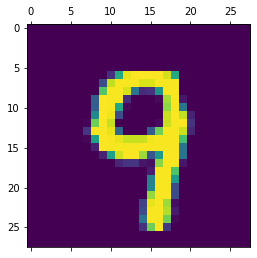

In [11]:
plt.matshow(X_train[520])

In [12]:
y_train[520]

9

So, we in the train dataset we have 60000 samples.
Each sample is represented by a matrix represented by a 2-D array of  28x28 matrix.
The values in the matrix varies from 0 to 255. 0 means black and 255 is white.

### Now we will reshape the 2-D array to a 1-D array of length 784. So, finally it will be an array of 60000x784

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [16]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

 ### Now we will create a simple neural network

In [19]:
# 10 output neurons will be there
# dense means each neruon in layer 2 is connected to each neuron in previous layer
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.5249 - accuracy: 0.4998
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3283 - accuracy: 0.6624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1889 - accuracy: 0.6902
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1384 - accuracy: 0.7008
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1125 - accuracy: 0.6996


### The accuracy is not very good. We might need to scale the values between 0 and 1.
### So we need to divide the array by 255.

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

### We will train again

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4845 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3063 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9262


### We can see now the accuracy is pretty good for the train dataset. Now lets test on the test dataset

In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9263


[0.26640015840530396, 0.9262999892234802]

### Lets see the result for an image

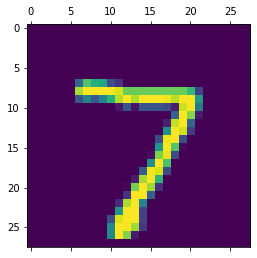

In [24]:
plt.matshow(X_test[0])

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.69519899e-05, 1.00076385e-10, 3.14700555e-05, 9.68549401e-03,
       1.37651716e-06, 5.88244948e-05, 1.19382826e-09, 7.46693194e-01,
       4.76751920e-05, 9.12349031e-04], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

### Correct prediction!

## Confusion matrix

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [36]:
confusoinMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusoinMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   3,    8,  926,   15,    9,    4,   12,   13,   38,    4],
       [   4,    0,   20,  926,    0,   20,    2,   12,   17,    9],
       [   1,    1,    3,    1,  924,    0,    9,    3,    8,   32],
       [   8,    1,    4,   36,   12,  761,   16,    8,   37,    9],
       [   9,    3,    8,    1,   10,   10,  912,    2,    3,    0],
       [   1,    5,   22,    6,    8,    0,    0,  951,    2,   33],
       [   7,    5,    6,   27,   10,   17,    9,   11,  870,   12],
       [   9,    6,    2,   10,   32,    5,    0,   16,    6,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Real Values')

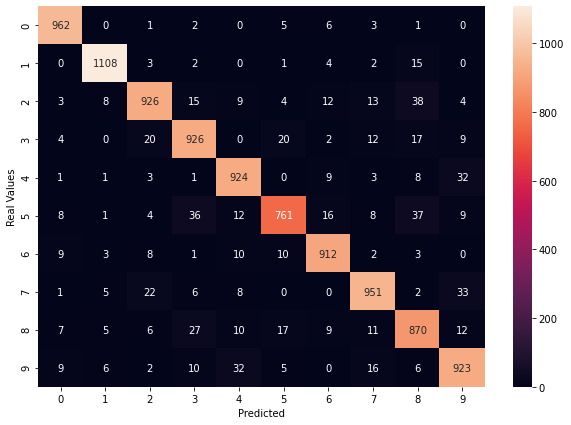

In [38]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusoinMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real Values')

### The values in the diagonal are values which are correctly predicted

# Adding a hidden layer

In [39]:
# we are using 100 neurons in the hidden layer and relu as the AF
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2890 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1358 - accuracy: 0.9611
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0984 - accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0626 - accuracy: 0.9807


In [40]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9724


[0.08787445724010468, 0.9724000096321106]

## We can see the accuracy has imporved quite a bit

Text(69.0, 0.5, 'Real Values')

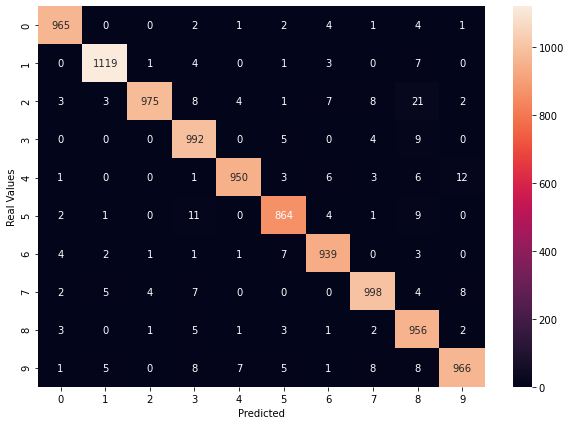

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

confusoinMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusoinMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real Values')

## Training without flattening the dataset initially

In [42]:
# The data can be flattened in keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2952 - accuracy: 0.9184
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1380 - accuracy: 0.9594
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0992 - accuracy: 0.9705
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9813


# Using 2 hidden layers

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4126 - accuracy: 0.8730
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1562 - accuracy: 0.9543
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1102 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0720 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9847
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0379 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.033

In [52]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9795


[0.08246789127588272, 0.9794999957084656]

### ig we are overfitting now.  The accuracy for train set is so good but test set saw only small improvements :(